## Lab 6: Classification Algorithms - Solutions



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import warnings
warnings.filterwarnings('ignore')

### Part 1. Non-linear decision boundary

* create and plot a simulated data set using code below
* inspect the plot visually; can you separate the orange and blue classes with a single linear boundary?
* split the dataset into train and test sets, train a logistic regression and knn classifiers and compute the accuracy and confusion matrix on the test set
* compare the accuracies of the two models and explain the difference

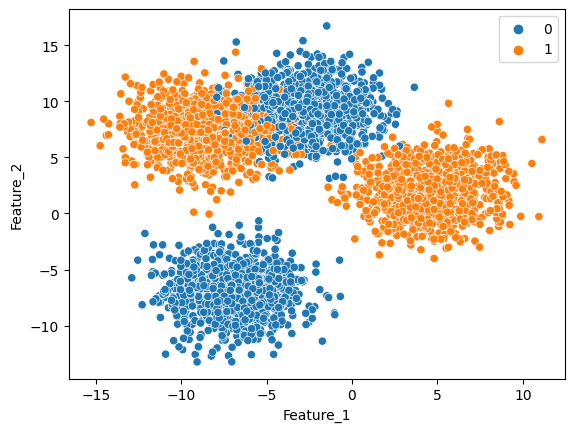

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42, cluster_std = 2, n_samples = [1000, 1000, 1000, 1000])
y = y % 2
df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])
sns.scatterplot(x = 'Feature_1', y = 'Feature_2', data = df, hue = y);

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
logr = LogisticRegression()
logr.fit(X_train, y_train)
print(classification_report(y_test, logr.predict(X_test), target_names = ['0', '1'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56       612
           1       0.57      0.71      0.64       588

    accuracy                           0.60      1200
  
confusion matrix:
 [[301 311]
 [168 420]]


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test), target_names = ['0', '1'])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       612
           1       0.97      0.97      0.97       588

    accuracy                           0.97      1200
  
confusion matrix:
 [[592  20]
 [ 20 568]]


### Plot decision boundaries:
- https://www.kaggle.com/code/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset 

In [5]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


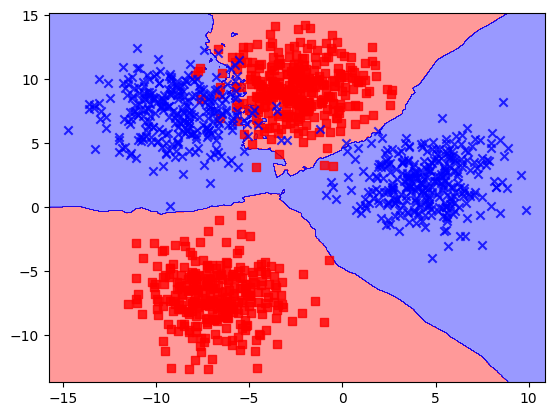

In [6]:
plot_decision_regions(X_test, y_test, knn)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


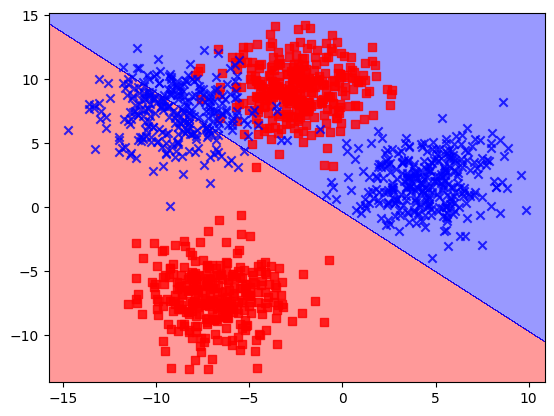

In [7]:
plot_decision_regions(X_test, y_test, logr)


### Part 2. Bank customer churn

Help a bank predict which customers are more likely to quit. The dataset provided for training a classifier model contains the following columns:

**Features**

- __CustomerId:__	A unique customer identification number
- __Surname:__	Customer’s last name
- __CreditScore:__	Customer’s credit score
- __Geography:__	Customer’s country
- __Gender:__	Customer’s gender
- __Age:__	Customer’s age
- __Tenure:__	Number of years that the customer has been a client of the bank
- __Balance:__	Customer’s account balance
- __NumOfProducts:__	Number of products the customer has purchased through the bank
- __HasCrCard:__	Whether or not a customer has a credit card
- __IsActiveMember:__	Is the customer active?
- __EstimatedSalary:__	Customer’s salary estimated from the customer’s bank product usage patterns

**Labels**

- __Exited:__	Whether or not the customer has left the bank


**Tasks:**

1. Import and inspect data
2. Prepare data for modeling:
    - Remove high-cardinality columns (hint: look for columns where the number of unique values is close to the number of rows in the dataset)
    - split the data into a training and test set
    - encode categorical variables
    - scale the feature columns
3. Train and evaluate a logistic regression model
4. Train and evaluate a KNN model
5. Train and evaluate a random forest model
6. How does precision and recall respond to threshold variation from 0 to 1? Find optimal thresholds to maximize recall for all 3 models


#### 1. Import and inspect data

In [8]:
df = pd.read_csv("https://github.com/wsko/data_science_academy/raw/main/data/Churn_Modeling.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# inspect data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### 2. Prepare data for modeling

In [10]:
# remove the first two columns

df = df.iloc[:, 2:]

# encode the categorical columns

df = pd.get_dummies(data = df, drop_first = True)

# examine label distribution

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
### create numpy arrays X and y
label = 'Exited'
features = list(df.columns)
features.remove(label)
X = df[features].to_numpy()
y = df[label].to_numpy()
print(X.shape, y.shape)

### split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### min-max scaling 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(10000, 11) (10000,)


#### 3. Train and test a Logistic Regression model

In [13]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [14]:
print(classification_report(y_test, logr.predict(X_test), target_names = ["Stay", "Exit"])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

        Stay       0.83      0.96      0.89      2416
        Exit       0.56      0.19      0.29       584

    accuracy                           0.81      3000
  
confusion matrix:
 [[2328   88]
 [ 472  112]]


#### 4. Train and test a KNN classifier

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
print(classification_report(y_test, knn.predict(X_test), target_names = ["Stay", "Exit"])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

        Stay       0.85      0.94      0.89      2416
        Exit       0.56      0.29      0.39       584

    accuracy                           0.82      3000
  
confusion matrix:
 [[2280  136]
 [ 412  172]]


#### 5. Train and test a Random Forest classifier

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(classification_report(y_test, rfc.predict(X_test), target_names = ["Stay", "Exit"])[:220])
print("confusion matrix:\n", confusion_matrix(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

        Stay       0.88      0.96      0.92      2416
        Exit       0.75      0.47      0.58       584

    accuracy                           0.87      3000
  
confusion matrix:
 [[2327   89]
 [ 310  274]]


#### 6. How does precision and recall respond to threshold variation from 0 to 1? Find optimal thresholds to maximize recall for all 3 models

In [18]:
p_lr = logr.predict_proba(X_test)[:,1]
p_knn = knn.predict_proba(X_test)[:,1]
p_rf = rfc.predict_proba(X_test)[:,1]

In [19]:
recall_lr = []
recall_knn = []
recall_rf = []

for thr in np.arange(0, 1, 0.05):
    recall_lr.append(recall_score(y_test, (p_lr > thr).astype(int)))
    recall_knn.append(recall_score(y_test, (p_knn > thr).astype(int)))
    recall_rf.append(recall_score(y_test, (p_rf > thr).astype(int)))

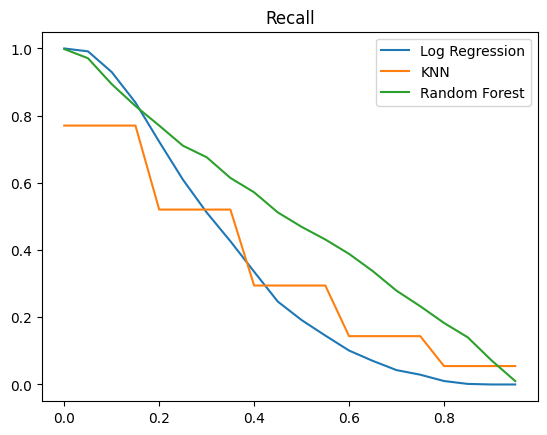

In [20]:
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = recall_lr, label = "Log Regression")
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = recall_knn, label = "KNN")
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = recall_rf, label = "Random Forest")
ax.set_title('Recall')
plt.show()

In [21]:
precision_lr = []
precision_knn = []
precision_rf = []

for thr in np.arange(0, 1, 0.05):
    precision_lr.append(precision_score(y_test, (p_lr > thr).astype(int)))
    precision_knn.append(precision_score(y_test, (p_knn > thr).astype(int)))
    precision_rf.append(precision_score(y_test, (p_rf > thr).astype(int)))

Text(0.5, 1.0, 'precision')

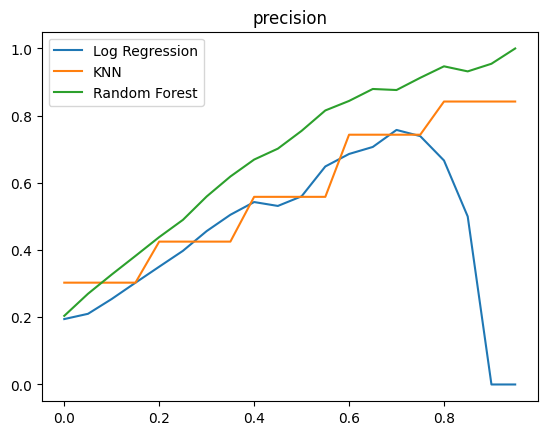

In [22]:
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = precision_lr, label = "Log Regression")
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = precision_knn, label = "KNN")
ax = sns.lineplot(x = np.arange(0, 1, 0.05), y = precision_rf, label = "Random Forest")
ax.set_title('precision')